In [12]:
#1

import pandas as pd
import numpy as np


# Load dataset
df = pd.read_csv("/Users/rahulgova/Desktop/heart dataset.csv")  


print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSample Data:\n", df.head())




Dataset Shape: (1888, 14)

Column Names:
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalachh    0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Sample Data:
    age  sex  cp  trestbps  chol  fbs  restecg  thalachh  exang  oldpeak  \
0   63    1   3       145   233    1        0       150      0      2.3   
1   37    1   2       130   250    0        1       187      0      3.5   
2   41    0   1       130   204    0        0       172    

In [13]:
#2 
X = df.drop("target", axis=1)
y = df["target"]


In [14]:
#3 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
#4

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

In [16]:
#5
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Probability for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
        
    }
    

In [17]:
#6 LR
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_results = evaluate_model(lr, X_test, y_test)


In [18]:
# SVD
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_results = evaluate_model(dt, X_test, y_test)


In [19]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_results = evaluate_model(knn, X_test, y_test)

In [20]:
#NBG
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_results = evaluate_model(nb, X_test, y_test)

In [21]:
#RF
rf = RandomForestClassifier(
    n_estimators=100, random_state=42
)
rf.fit(X_train, y_train)
rf_results = evaluate_model(rf, X_test, y_test)


In [22]:
# Cmparision of Results 


results_df = pd.DataFrame({
    "Logistic Regression": lr_results,
    "Decision Tree": dt_results,
    "KNN": knn_results,
    "Naive Bayes": nb_results,
    "Random Forest": rf_results,

    
}).T

print(results_df)

                     Accuracy       AUC  Precision    Recall  F1 Score  \
Logistic Regression  0.727513  0.831773   0.706667  0.811224  0.755344   
Decision Tree        0.976190  0.976256   0.979487  0.974490  0.976982   
KNN                  0.801587  0.788055   0.795122  0.831633  0.812968   
Naive Bayes          0.708995  0.789835   0.682203  0.821429  0.745370   
Random Forest        0.978836  0.998542   0.974747  0.984694  0.979695   

                          MCC  
Logistic Regression  0.456640  
Decision Tree        0.952338  
KNN                  0.602614  
Naive Bayes          0.422327  
Random Forest        0.957651  


<Figure size 1200x600 with 0 Axes>

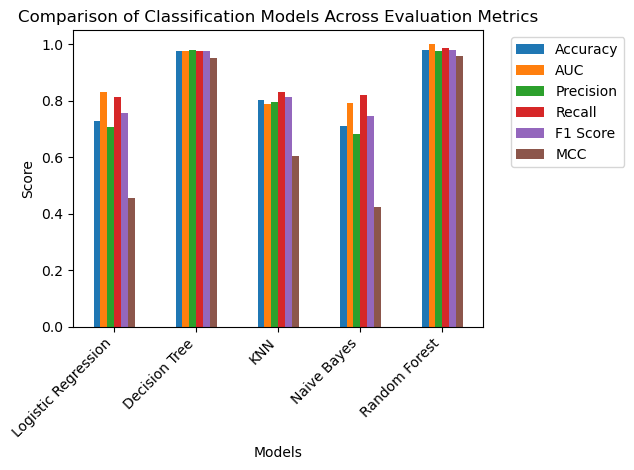

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame from results
results_df = pd.DataFrame({
    "Accuracy": [0.727513, 0.976190, 0.801587, 0.708995, 0.978836],
    "AUC": [0.831773, 0.976256, 0.788055, 0.789835, 0.998542],
    "Precision": [0.706667, 0.979487, 0.795122, 0.682203, 0.974747],
    "Recall": [0.811224, 0.974490, 0.831633, 0.821429, 0.984694],
    "F1 Score": [0.755344, 0.976982, 0.812968, 0.745370, 0.979695],
    "MCC": [0.456640, 0.952338, 0.602614, 0.422327, 0.957651]
}, index=[
    "Logistic Regression",
    "Decision Tree",
    "KNN",
    "Naive Bayes",
    "Random Forest"
])

# Plot comparison graph
plt.figure(figsize=(12,6))
results_df.plot(kind="bar")
plt.title("Comparison of Classification Models Across Evaluation Metrics")
plt.ylabel("Score")
plt.xlabel("Models")
plt.xticks(rotation=45, ha="right")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [24]:

"""1.1 Logistic Regression
Shows moderate accuracy and AUC
Performs well in recall but lower MCC indicates weaker overall correlation
Suitable as a baseline linear model
1.2 Decision Tree
Very high accuracy, F1-score, and MCC
Captures complex patterns effectively
Risk of overfitting, but performance is strong on this dataset
1.3 K-Nearest Neighbors (KNN)
Balanced performance across all metrics
Works well for local patterns
Computationally expensive for large datasets
1.4  Naive Bayes
Fast and simple model
Good recall but lower precision and MCC
Assumption of feature independence limits performance
1.5  Random Forest
Best overall performer
Highest AUC and MCC, indicating strong and stable classification
Ensemble approach reduces overfitting and improves generalization

 2. Conclusion: Random Forest outperforms all other models,
 followed closely by Decision Tree, 
 while Logistic Regression and Naive Bayes serve as baseline classifiers."""

'1.1 Logistic Regression\nShows moderate accuracy and AUC\nPerforms well in recall but lower MCC indicates weaker overall correlation\nSuitable as a baseline linear model\n1.2 Decision Tree\nVery high accuracy, F1-score, and MCC\nCaptures complex patterns effectively\nRisk of overfitting, but performance is strong on this dataset\n1.3 K-Nearest Neighbors (KNN)\nBalanced performance across all metrics\nWorks well for local patterns\nComputationally expensive for large datasets\n1.4  Naive Bayes\nFast and simple model\nGood recall but lower precision and MCC\nAssumption of feature independence limits performance\n1.5  Random Forest\nBest overall performer\nHighest AUC and MCC, indicating strong and stable classification\nEnsemble approach reduces overfitting and improves generalization\n\n 2. Conclusion: Random Forest outperforms all other models,\n followed closely by Decision Tree, \n while Logistic Regression and Naive Bayes serve as baseline classifiers.'

In [27]:
import joblib

# RF Model
joblib.dump(rf, "heart_model.pkl")

['heart_model.pkl']